<a href="https://colab.research.google.com/github/oneoclockc/MLclass/blob/main/w3_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wide vs. Long Format Data

In [2]:
# 데이터 다운로드
!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_03/data/bitcoin.csv
!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_03/data/dirty_data.csv
!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_03/data/long_data.csv
!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_03/data/nyc_temperatures.csv
!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_03/data/sp500.csv
!wget https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_03/data/wide_data.csv
!mkdir data
!mv *.csv data

--2024-09-19 03:34:48--  https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_03/data/bitcoin.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48089 (47K) [text/plain]
Saving to: ‘bitcoin.csv’

bitcoin.csv         100%[===================>]  46.96K  --.-KB/s    in 0.008s  

2024-09-19 03:34:48 (5.92 MB/s) - ‘bitcoin.csv’ saved [48089/48089]

--2024-09-19 03:34:48--  https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_03/data/dirty_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.

In [3]:
# 패키지 다운로드
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# df 생성
wide_df = pd.read_csv('data/wide_data.csv', parse_dates=['date'])
long_df = pd.read_csv(
    'data/long_data.csv',
    usecols=['date', 'datatype', 'value'],
    parse_dates=['date']
)[['date', 'datatype', 'value']] # sort columns

In [5]:
wide_df.head(6)

,date,TMAX,TMIN,TOBS
0,2018-10-01,21.1,8.9,13.9
1,2018-10-02,23.9,13.9,17.2
2,2018-10-03,25.0,15.6,16.1
3,2018-10-04,22.8,11.7,11.7
4,2018-10-05,23.3,11.7,18.9
5,2018-10-06,20.0,13.3,16.1


In [6]:
long_df.head(6)

,date,datatype,value
0,2018-10-01,TMAX,21.1
1,2018-10-01,TMIN,8.9
2,2018-10-01,TOBS,13.9
3,2018-10-02,TMAX,23.9
4,2018-10-02,TMIN,13.9
5,2018-10-02,TOBS,17.2


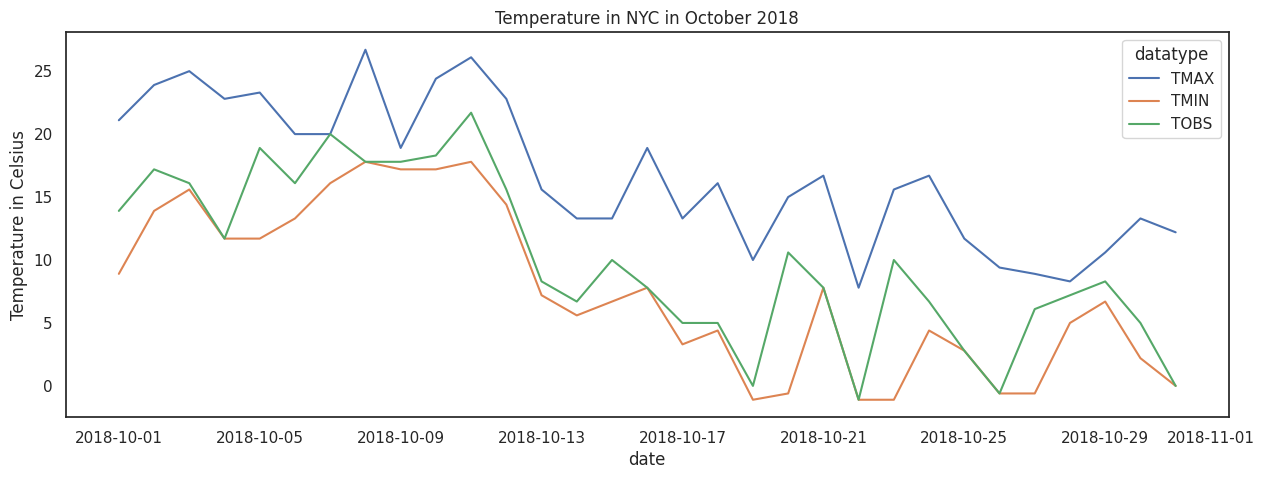

In [9]:
import seaborn as sns

sns.set(rc={'figure.figsize': (15, 5)}, style='white')
ax = sns.lineplot(
    data=long_df, x='date', y='value', hue='datatype'
)
ax.set_ylabel('Temperature in Celsius')
ax.set_title('Temperature in NYC in October 2018')
plt.show()

# cleaning_data

In [75]:
# 데이터 불러오기
df = pd.read_csv('data/nyc_temperatures.csv')
df.head()

,date,datatype,station,attributes,value
0,2018-10-01T00:00:00,TAVG,GHCND:USW00014732,"H,,S,",21.2
1,2018-10-01T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",25.6
2,2018-10-01T00:00:00,TMIN,GHCND:USW00014732,",,W,2400",18.3
3,2018-10-02T00:00:00,TAVG,GHCND:USW00014732,"H,,S,",22.7
4,2018-10-02T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",26.1


In [76]:
df.columns

Index(['date', 'datatype', 'station', 'attributes', 'value'], dtype='object')

In [77]:
df.rename(
    columns={
        'value': 'temp_C',
        'attributes': 'flags'
    }, inplace=True)

In [78]:
df.head()

,date,datatype,station,flags,temp_C
0,2018-10-01T00:00:00,TAVG,GHCND:USW00014732,"H,,S,",21.2
1,2018-10-01T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",25.6
2,2018-10-01T00:00:00,TMIN,GHCND:USW00014732,",,W,2400",18.3
3,2018-10-02T00:00:00,TAVG,GHCND:USW00014732,"H,,S,",22.7
4,2018-10-02T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",26.1


In [54]:
# 대문자로
df.rename(str.upper, axis='columns').columns

Index(['DATE', 'DATATYPE', 'STATION', 'FLAGS', 'TEMP_C'], dtype='object')

In [55]:
df.dtypes

,0
date,object
datatype,object
station,object
flags,object
temp_C,float64


In [60]:
# datatime으로 변경
df= df.assign(date=pd.to_datetime(df.date) )
df.dtypes

,0
date,datetime64[ns]
datatype,object
station,object
flags,object
temp_C,float64


In [25]:
pd.date_range(start='2018-10-25', periods=2, freq='D').tz_localize('EST')

DatetimeIndex(['2018-10-25 00:00:00-05:00', '2018-10-26 00:00:00-05:00'], dtype='datetime64[ns, EST]', freq=None)

In [26]:
eastern = pd.read_csv(
    'data/nyc_temperatures.csv', index_col='date', parse_dates=True
).tz_localize('EST')
eastern.head()

,datatype,station,attributes,value
date,,,,
2018-10-01 00:00:00-05:00,TAVG,GHCND:USW00014732,"H,,S,",21.2
2018-10-01 00:00:00-05:00,TMAX,GHCND:USW00014732,",,W,2400",25.6
2018-10-01 00:00:00-05:00,TMIN,GHCND:USW00014732,",,W,2400",18.3
2018-10-02 00:00:00-05:00,TAVG,GHCND:USW00014732,"H,,S,",22.7
2018-10-02 00:00:00-05:00,TMAX,GHCND:USW00014732,",,W,2400",26.1


In [27]:
eastern.tz_convert('UTC').head()

,datatype,station,attributes,value
date,,,,
2018-10-01 05:00:00+00:00,TAVG,GHCND:USW00014732,"H,,S,",21.2
2018-10-01 05:00:00+00:00,TMAX,GHCND:USW00014732,",,W,2400",25.6
2018-10-01 05:00:00+00:00,TMIN,GHCND:USW00014732,",,W,2400",18.3
2018-10-02 05:00:00+00:00,TAVG,GHCND:USW00014732,"H,,S,",22.7
2018-10-02 05:00:00+00:00,TMAX,GHCND:USW00014732,",,W,2400",26.1


In [28]:
eastern.tz_localize(None).to_period('M').index # 기간 월별 집계

PeriodIndex(['2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-

In [29]:
df = pd.read_csv('data/nyc_temperatures.csv').rename(
    columns={
        'value': 'temp_C',
        'attributes': 'flags'
    }
)

# 새로운 값 할당
new_df = df.assign(
    date=pd.to_datetime(df.date),
    temp_F=(df.temp_C * 9/5) + 32
)
new_df.dtypes

,0
date,datetime64[ns]
datatype,object
station,object
flags,object
temp_C,float64
temp_F,float64


In [30]:
new_df.head()

,date,datatype,station,flags,temp_C,temp_F
0,2018-10-01,TAVG,GHCND:USW00014732,"H,,S,",21.2,70.16
1,2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,78.08
2,2018-10-01,TMIN,GHCND:USW00014732,",,W,2400",18.3,64.94
3,2018-10-02,TAVG,GHCND:USW00014732,"H,,S,",22.7,72.86
4,2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,78.98


In [31]:
# temp를 정수로 반올림
df = df.assign(
    date=lambda x: pd.to_datetime(x.date),
    temp_C_whole=lambda x: x.temp_C.astype('int'),
    temp_F=lambda x: (x.temp_C * 9/5) + 32,
    temp_F_whole=lambda x: x.temp_F.astype('int')
)

df.head()

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
0,2018-10-01,TAVG,GHCND:USW00014732,"H,,S,",21.2,21,70.16,70
1,2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
2,2018-10-01,TMIN,GHCND:USW00014732,",,W,2400",18.3,18,64.94,64
3,2018-10-02,TAVG,GHCND:USW00014732,"H,,S,",22.7,22,72.86,72
4,2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78


In [32]:
df_with_categories = df.assign(
    station=df.station.astype('category'),
    datatype=df.datatype.astype('category')
)
df_with_categories.dtypes

,0
date,datetime64[ns]
datatype,category
station,category
flags,object
temp_C,float64
temp_C_whole,int64
temp_F,float64
temp_F_whole,int64


In [33]:
df_with_categories.describe(include='category')

,datatype,station
count,93,93
unique,3,1
top,TAVG,GHCND:USW00014732
freq,31,93


In [35]:
# 범주형 데이터 코딩
pd.Categorical(
    ['med', 'med', 'low', 'high'],
    categories=['low', 'med', 'high'],
    ordered=True
)

['med', 'med', 'low', 'high']
Categories (3, object): ['low' < 'med' < 'high']

In [36]:
# 데이터 정렬 (tempC 내림차순으로)
df[df.datatype == 'TMAX'].sort_values(by='temp_C', ascending=False).head(10)

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
19,2018-10-07,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
28,2018-10-10,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
31,2018-10-11,TMAX,GHCND:USW00014732,",,W,2400",26.7,26,80.06,80
10,2018-10-04,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
4,2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
1,2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
25,2018-10-09,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
7,2018-10-03,TMAX,GHCND:USW00014732,",,W,2400",25.0,25,77.00,77
13,2018-10-05,TMAX,GHCND:USW00014732,",,W,2400",22.8,22,73.04,73
22,2018-10-08,TMAX,GHCND:USW00014732,",,W,2400",22.8,22,73.04,73


In [37]:
# 동점 처리
df[df.datatype == 'TMAX'].sort_values(by=['temp_C', 'date'], ascending=[False, True]).head(10)

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
19,2018-10-07,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
28,2018-10-10,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
31,2018-10-11,TMAX,GHCND:USW00014732,",,W,2400",26.7,26,80.06,80
4,2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
10,2018-10-04,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
1,2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
25,2018-10-09,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
7,2018-10-03,TMAX,GHCND:USW00014732,",,W,2400",25.0,25,77.00,77
13,2018-10-05,TMAX,GHCND:USW00014732,",,W,2400",22.8,22,73.04,73
22,2018-10-08,TMAX,GHCND:USW00014732,",,W,2400",22.8,22,73.04,73


In [39]:
df.sample(5, random_state=0).sort_index().index

Index([2, 13, 16, 30, 55], dtype='int64')

In [38]:
# 컬럼 알파벳순으로
df.sort_index(axis=1).head()

,datatype,date,flags,station,temp_C,temp_C_whole,temp_F,temp_F_whole
0,TAVG,2018-10-01,"H,,S,",GHCND:USW00014732,21.2,21,70.16,70
1,TMAX,2018-10-01,",,W,2400",GHCND:USW00014732,25.6,25,78.08,78
2,TMIN,2018-10-01,",,W,2400",GHCND:USW00014732,18.3,18,64.94,64
3,TAVG,2018-10-02,"H,,S,",GHCND:USW00014732,22.7,22,72.86,72
4,TMAX,2018-10-02,",,W,2400",GHCND:USW00014732,26.1,26,78.98,78


In [41]:
# 인덱스 설정
df.set_index('date', inplace=True)
df.head()

,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
date,,,,,,,
2018-10-01,TAVG,GHCND:USW00014732,"H,,S,",21.2,21,70.16,70
2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
2018-10-01,TMIN,GHCND:USW00014732,",,W,2400",18.3,18,64.94,64
2018-10-02,TAVG,GHCND:USW00014732,"H,,S,",22.7,22,72.86,72
2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78


In [42]:
df['2018-10-11':'2018-10-12']

,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
date,,,,,,,
2018-10-11,TAVG,GHCND:USW00014732,"H,,S,",23.4,23,74.12,74
2018-10-11,TMAX,GHCND:USW00014732,",,W,2400",26.7,26,80.06,80
2018-10-11,TMIN,GHCND:USW00014732,",,W,2400",21.7,21,71.06,71
2018-10-12,TAVG,GHCND:USW00014732,"H,,S,",18.3,18,64.94,64
2018-10-12,TMAX,GHCND:USW00014732,",,W,2400",22.2,22,71.96,71
2018-10-12,TMIN,GHCND:USW00014732,",,W,2400",12.2,12,53.96,53


In [43]:
df['2018-10-11':'2018-10-12'].reset_index()

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
0,2018-10-11,TAVG,GHCND:USW00014732,"H,,S,",23.4,23,74.12,74
1,2018-10-11,TMAX,GHCND:USW00014732,",,W,2400",26.7,26,80.06,80
2,2018-10-11,TMIN,GHCND:USW00014732,",,W,2400",21.7,21,71.06,71
3,2018-10-12,TAVG,GHCND:USW00014732,"H,,S,",18.3,18,64.94,64
4,2018-10-12,TMAX,GHCND:USW00014732,",,W,2400",22.2,22,71.96,71
5,2018-10-12,TMIN,GHCND:USW00014732,",,W,2400",12.2,12,53.96,53


In [80]:
# task1
df.head()

,date,datatype,station,flags,temp_C
0,2018-10-01T00:00:00,TAVG,GHCND:USW00014732,"H,,S,",21.2
1,2018-10-01T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",25.6
2,2018-10-01T00:00:00,TMIN,GHCND:USW00014732,",,W,2400",18.3
3,2018-10-02T00:00:00,TAVG,GHCND:USW00014732,"H,,S,",22.7
4,2018-10-02T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",26.1


In [83]:
df[df.datatype == 'TMIN'].sort_values(by='temp_C', ascending=False).head(10)

,date,datatype,station,flags,temp_C
29,2018-10-10T00:00:00,TMIN,GHCND:USW00014732,",,W,2400",21.7
32,2018-10-11T00:00:00,TMIN,GHCND:USW00014732,",,W,2400",21.7
20,2018-10-07T00:00:00,TMIN,GHCND:USW00014732,",,W,2400",21.1
26,2018-10-09T00:00:00,TMIN,GHCND:USW00014732,",,W,2400",19.4
5,2018-10-02T00:00:00,TMIN,GHCND:USW00014732,",,W,2400",19.4
8,2018-10-03T00:00:00,TMIN,GHCND:USW00014732,",,W,2400",18.9
2,2018-10-01T00:00:00,TMIN,GHCND:USW00014732,",,W,2400",18.3
23,2018-10-08T00:00:00,TMIN,GHCND:USW00014732,",,W,2400",18.3
11,2018-10-04T00:00:00,TMIN,GHCND:USW00014732,",,W,2400",17.8
17,2018-10-06T00:00:00,TMIN,GHCND:USW00014732,",,W,2400",17.8


# reshaping_data

In [62]:
long_df = pd.read_csv(
    'data/long_data.csv', usecols=['date', 'datatype', 'value']
).rename(
    columns={'value': 'temp_C'}
).assign(
    date=lambda x: pd.to_datetime(x.date),
    temp_F=lambda x: (x.temp_C * 9/5) + 32
)
long_df.head()

,datatype,date,temp_C,temp_F
0,TMAX,2018-10-01,21.1,69.98
1,TMIN,2018-10-01,8.9,48.02
2,TOBS,2018-10-01,13.9,57.02
3,TMAX,2018-10-02,23.9,75.02
4,TMIN,2018-10-02,13.9,57.02


In [64]:
# T -> 행렬 반전
long_df.set_index('date').head(6).T

date,2018-10-01,2018-10-01,2018-10-01,2018-10-02,2018-10-02,2018-10-02
datatype,TMAX,TMIN,TOBS,TMAX,TMIN,TOBS
temp_C,21.1,8.9,13.9,23.9,13.9,17.2
temp_F,69.98,48.02,57.02,75.02,57.02,62.96


In [65]:
# 피봇테이블
pivoted_df = long_df.pivot(
    index='date', columns='datatype', values='temp_C'
)
pivoted_df.head()

datatype,TMAX,TMIN,TOBS
date,,,
2018-10-01,21.1,8.9,13.9
2018-10-02,23.9,13.9,17.2
2018-10-03,25.0,15.6,16.1
2018-10-04,22.8,11.7,11.7
2018-10-05,23.3,11.7,18.9


In [66]:
pivoted_df = long_df.pivot(
    index='date', columns='datatype', values=['temp_C', 'temp_F']
)
pivoted_df.head()

temp_C             temp_F              
datatype     TMAX  TMIN  TOBS   TMAX   TMIN   TOBS
date                                              
2018-10-01   21.1   8.9  13.9  69.98  48.02  57.02
2018-10-02   23.9  13.9  17.2  75.02  57.02  62.96
2018-10-03   25.0  15.6  16.1  77.00  60.08  60.98
2018-10-04   22.8  11.7  11.7  73.04  53.06  53.06
2018-10-05   23.3  11.7  18.9  73.94  53.06  66.02

In [67]:
pivoted_df['temp_F']['TMIN'].head()

,TMIN
date,
2018-10-01,48.02
2018-10-02,57.02
2018-10-03,60.08
2018-10-04,53.06
2018-10-05,53.06


In [68]:
# 멀티인덱스
multi_index_df = long_df.set_index(['date', 'datatype'])
multi_index_df.head().index

MultiIndex([('2018-10-01', 'TMAX'),
            ('2018-10-01', 'TMIN'),
            ('2018-10-01', 'TOBS'),
            ('2018-10-02', 'TMAX'),
            ('2018-10-02', 'TMIN')],
           names=['date', 'datatype'])

In [69]:
multi_index_df.head()

temp_C  temp_F
date       datatype                
2018-10-01 TMAX        21.1   69.98
           TMIN         8.9   48.02
           TOBS        13.9   57.02
2018-10-02 TMAX        23.9   75.02
           TMIN        13.9   57.02

In [71]:
long_df.head()

,datatype,date,temp_C,temp_F
0,TMAX,2018-10-01,21.1,69.98
1,TMIN,2018-10-01,8.9,48.02
2,TOBS,2018-10-01,13.9,57.02
3,TMAX,2018-10-02,23.9,75.02
4,TMIN,2018-10-02,13.9,57.02


In [84]:
extra_data = pd.concat([long_df, pd.DataFrame([{
    'datatype': 'TAVG',
    'date': pd.to_datetime('2018-10-01'),
    'temp_C': 10,
    'temp_F': 50
}]) ]).set_index(['date', 'datatype']).sort_index()
extra_data['2018-10-01':'2018-10-02']

# df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

temp_C  temp_F
date       datatype                
2018-10-01 TAVG        10.0   50.00
           TMAX        21.1   69.98
           TMIN         8.9   48.02
           TOBS        13.9   57.02
2018-10-02 TMAX        23.9   75.02
           TMIN        13.9   57.02
           TOBS        17.2   62.96

In [85]:
# 결측치 채우기
extra_data.unstack(fill_value=-40).head()

temp_C                   temp_F                     
datatype     TAVG  TMAX  TMIN  TOBS   TAVG   TMAX   TMIN   TOBS
date                                                           
2018-10-01   10.0  21.1   8.9  13.9   50.0  69.98  48.02  57.02
2018-10-02  -40.0  23.9  13.9  17.2  -40.0  75.02  57.02  62.96
2018-10-03  -40.0  25.0  15.6  16.1  -40.0  77.00  60.08  60.98
2018-10-04  -40.0  22.8  11.7  11.7  -40.0  73.04  53.06  53.06
2018-10-05  -40.0  23.3  11.7  18.9  -40.0  73.94  53.06  66.02

In [86]:
wide_df = pd.read_csv('data/wide_data.csv')
wide_df.head()

,date,TMAX,TMIN,TOBS
0,2018-10-01,21.1,8.9,13.9
1,2018-10-02,23.9,13.9,17.2
2,2018-10-03,25.0,15.6,16.1
3,2018-10-04,22.8,11.7,11.7
4,2018-10-05,23.3,11.7,18.9


와이드 포맷에서 롱 포맷으로 전환하려면 멜트() 방법을 사용합니다. 명시해야 합니다:

id_vars: 넓은 형식의 행을 고유하게 식별하는 열(날짜, 여기)
value_vars: 값(들)을 포함하는 열(TMAX, TMIN, TOBS, 여기)
선택적으로 다음을 제공할 수도 있습니다:

value_name: 녹으면 모든 값이 포함되는 열을 뭐라고 부를까요
var_name: 측정할 변수의 이름이 포함될 열을 부를 것입니다

In [87]:
# wide -> long으로 변경
melted_df = wide_df.melt(
    id_vars='date',
    value_vars=['TMAX', 'TMIN', 'TOBS'],
    value_name='temp_C',
    var_name='measurement'
)
melted_df.head()

,date,measurement,temp_C
0,2018-10-01,TMAX,21.1
1,2018-10-02,TMAX,23.9
2,2018-10-03,TMAX,25.0
3,2018-10-04,TMAX,22.8
4,2018-10-05,TMAX,23.3


In [89]:
stacked_series = wide_df.stack() #
stacked_series.head()

0  date    2018-10-01
   TMAX          21.1
   TMIN           8.9
   TOBS          13.9
1  date    2018-10-02
dtype: object

# handling_data_issues

In [90]:
df = pd.read_csv('data/dirty_data.csv')
df.head()

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
0,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
1,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
2,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
3,2018-01-02T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-8.3,-16.1,-12.2,NaN,False
4,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False


In [91]:
df.describe()

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF
count,765.000000,577.000000,577.0,765.000000,765.000000,398.000000,11.000000
mean,5.360392,4.202773,NaN,2649.175294,-15.914379,8.632161,16.290909
std,10.002138,25.086077,NaN,2744.156281,24.242849,9.815054,9.489832
min,0.000000,0.000000,-inf,-11.700000,-40.000000,-16.100000,1.800000
25%,0.000000,0.000000,NaN,13.300000,-40.000000,0.150000,8.600000
50%,0.000000,0.000000,NaN,32.800000,-11.100000,8.300000,19.300000
75%,5.800000,0.000000,NaN,5505.000000,6.700000,18.300000,24.900000
max,61.700000,229.000000,inf,5505.000000,23.900000,26.100000,28.700000


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               765 non-null    object 
 1   station            765 non-null    object 
 2   PRCP               765 non-null    float64
 3   SNOW               577 non-null    float64
 4   SNWD               577 non-null    float64
 5   TMAX               765 non-null    float64
 6   TMIN               765 non-null    float64
 7   TOBS               398 non-null    float64
 8   WESF               11 non-null     float64
 9   inclement_weather  408 non-null    object 
dtypes: float64(7), object(3)
memory usage: 59.9+ KB


In [92]:
df[df.inclement_weather.isna()].shape[0]
# 결측치 찾기

357

In [99]:
import numpy as np
df[df.SNWD.isin([-np.inf, np.inf])].shape[0]

577